In [1]:
from pyautoml import Clean, Preprocess, Feature
import pandas as pd

train_data = pd.read_csv('data/train.csv') 

Loading BokehJS ...

In [2]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

## Cleaning

In [3]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,570,712,712,NaN,712,NaN,NaN
mean,436.646,0.373596,2.32303,NaN,NaN,29.6786,0.515449,0.370787,NaN,32.3572,NaN,NaN
std,259.413,0.484098,0.836662,NaN,NaN,14.2924,1.09841,0.799184,NaN,51.6814,NaN,NaN
min,1,0,1,NaN,NaN,0.75,0,0,NaN,0,NaN,NaN
25%,208.75,0,2,NaN,NaN,21,0,0,NaN,7.8958,NaN,NaN
50%,426.5,0,3,NaN,NaN,28,0,0,NaN,13.2083,NaN,NaN
75%,661.25,1,3,NaN,NaN,38,1,0,NaN,31.3875,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,570,712,712,712,712,166,710
uniques,712,2,3,712,2,81,7,7,572,225,122,3


In [4]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,570,712,712,712,712,166,710
uniques,712,2,3,712,2,81,7,7,572,225,122,3
missing,0,0,0,0,0,142,0,0,0,0,546,2
missing_perc,0%,0%,0%,0%,0%,19.94%,0%,0%,0%,0%,76.69%,0.28%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                        32.3572
std                         51.6814
variance                    2670.97
min                               0
max                         512.329
mode                         7.8958
5%                            7.125
25%                          7.8958
50%                         13.2083
75%                         31.3875
95%                          111.96
iqr                         23.4917
kurtosis                    34.5841
skewness                    4.93806
sum                         23038.3
mad                         28.8799
cv                          1.59722
zeros_num                        13
zeros_perc                    1.83%
deviating_of_mean                16
deviating_of_mean_perc        2.25%
deviating_of_median              42
deviating_of_median_perc      5.90%
top_correlations                   
counts                          712
uniques                         225
missing                           0
missing_perc                

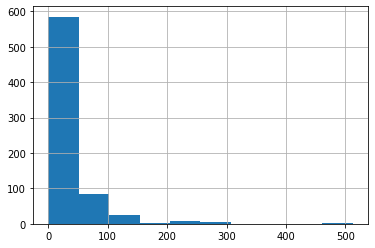

In [5]:
clean.describe_column('Fare')

32.357214466292135

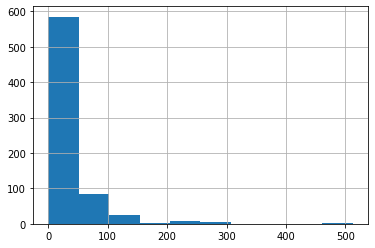

In [6]:
clean.describe_column('Fare')['mean']

In [7]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,546.000000,142.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.766854,0.199438,0.002809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,141.000000,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.787709,0.195531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [9]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,C87,26.55,S
1,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,C22 C26,151.55,S
2,790,0,1,"Guggenheim, Mr. Benjamin",male,46.00,0,0,PC 17593,B82 B84,79.2,C
3,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,NaN,65,S
4,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,B22,71,S
5,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.00,0,0,363294,NaN,8.05,S
6,362,0,2,"del Carlo, Mr. Sebastiano",male,29.00,1,0,SC/PARIS 2167,NaN,27.7208,C
7,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,NaN,33,S
8,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,NaN,7.7875,Q
9,371,1,1,"Harder, Mr. George Achilles",male,25.00,1,0,11765,E50,55.4417,C


In [10]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,546.000000,142.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.766854,0.199438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,141.000000,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.787709,0.195531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


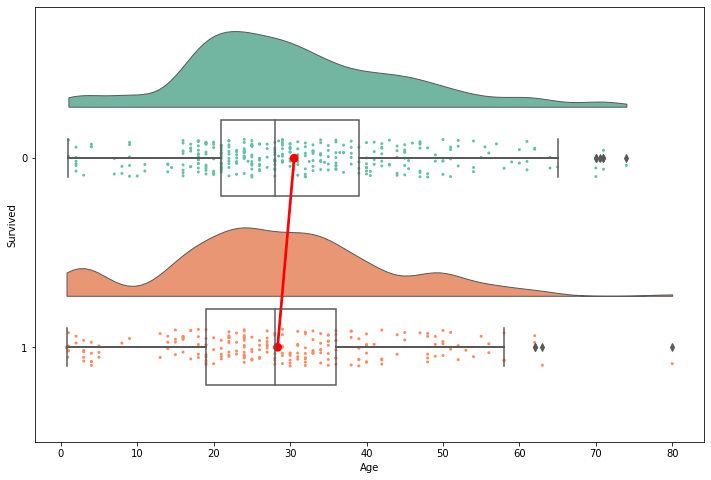

In [11]:
clean.visualize_raincloud('Age')

In [12]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,546.000000,142.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.766854,0.199438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,141.000000,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.787709,0.195531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,C87,26.55,S
1,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,C22 C26,151.55,S
2,790,0,1,"Guggenheim, Mr. Benjamin",male,46.00,0,0,PC 17593,B82 B84,79.2,C
3,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,NaN,65,S
4,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,B22,71,S
5,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.00,0,0,363294,NaN,8.05,S
6,362,0,2,"del Carlo, Mr. Sebastiano",male,29.00,1,0,SC/PARIS 2167,NaN,27.7208,C
7,597,1,2,"Leitch, Miss. Jessie Wills",female,38.00,0,0,248727,NaN,33,S
8,83,1,3,"McDermott, Miss. Brigdet Delia",female,24.00,0,0,330932,NaN,7.7875,Q
9,371,1,1,"Harder, Mr. George Achilles",male,25.00,1,0,11765,E50,55.4417,C


In [14]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,546.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.766854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,141.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.787709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
## Proving iter1 is a completely separate instance

iter1.missing_values

In [16]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean')

In [17]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.55,S
1,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,S
2,790,0,1,"Guggenheim, Mr. Benjamin",male,46.00,0,0,PC 17593,79.2,C
3,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,65,S
4,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71,S
5,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.00,0,0,363294,8.05,S
6,362,0,2,"del Carlo, Mr. Sebastiano",male,29.00,1,0,SC/PARIS 2167,27.7208,C
7,597,1,2,"Leitch, Miss. Jessie Wills",female,38.00,0,0,248727,33,S
8,83,1,3,"McDermott, Miss. Brigdet Delia",female,24.00,0,0,330932,7.7875,Q
9,371,1,1,"Harder, Mr. George Achilles",male,25.00,1,0,11765,55.4417,C


## Feature Engineering

In [18]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [19]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.55,S,Mr
1,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,S,Master
2,790,0,1,"Guggenheim, Mr. Benjamin",male,46.00,0,0,PC 17593,79.2,C,Mr
3,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,65,S,Mrs
4,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71,S,Officer
5,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.00,0,0,363294,8.05,S,Mr
6,362,0,2,"del Carlo, Mr. Sebastiano",male,29.00,1,0,SC/PARIS 2167,27.7208,C,Mr
7,597,1,2,"Leitch, Miss. Jessie Wills",female,38.00,0,0,248727,33,S,Miss
8,83,1,3,"McDermott, Miss. Brigdet Delia",female,24.00,0,0,330932,7.7875,Q,Miss
9,371,1,1,"Harder, Mr. George Achilles",male,25.00,1,0,11765,55.4417,C,Mr


In [20]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [21]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.55,S,Mr,0
1,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,S,Master,3
2,790,0,1,"Guggenheim, Mr. Benjamin",male,46.00,0,0,PC 17593,79.2,C,Mr,0
3,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,65,S,Mrs,3
4,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71,S,Officer,2
5,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.00,0,0,363294,8.05,S,Mr,0
6,362,0,2,"del Carlo, Mr. Sebastiano",male,29.00,1,0,SC/PARIS 2167,27.7208,C,Mr,1
7,597,1,2,"Leitch, Miss. Jessie Wills",female,38.00,0,0,248727,33,S,Miss,0
8,83,1,3,"McDermott, Miss. Brigdet Delia",female,24.00,0,0,330932,7.7875,Q,Miss,0
9,371,1,1,"Harder, Mr. George Achilles",male,25.00,1,0,11765,55.4417,C,Mr,1


In [22]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.55,S,Mr,0,male
1,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,S,Master,3,child
2,790,0,1,"Guggenheim, Mr. Benjamin",male,46.00,0,0,PC 17593,79.2,C,Mr,0,male
3,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,65,S,Mrs,3,female
4,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71,S,Officer,2,male
5,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.00,0,0,363294,8.05,S,Mr,0,male
6,362,0,2,"del Carlo, Mr. Sebastiano",male,29.00,1,0,SC/PARIS 2167,27.7208,C,Mr,1,male
7,597,1,2,"Leitch, Miss. Jessie Wills",female,38.00,0,0,248727,33,S,Miss,0,female
8,83,1,3,"McDermott, Miss. Brigdet Delia",female,24.00,0,0,330932,7.7875,Q,Miss,0,female
9,371,1,1,"Harder, Mr. George Achilles",male,25.00,1,0,11765,55.4417,C,Mr,1,male


In [23]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.55,S,Mr,0,male
1,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,S,Master,3,child
2,790,0,1,"Guggenheim, Mr. Benjamin",male,46.00,0,0,PC 17593,79.2,C,Mr,0,male
3,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,65,S,Mrs,3,female
4,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71,S,Officer,2,male
5,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.00,0,0,363294,8.05,S,Mr,0,male
6,362,0,2,"del Carlo, Mr. Sebastiano",male,29.00,1,0,SC/PARIS 2167,27.7208,C,Mr,1,male
7,597,1,2,"Leitch, Miss. Jessie Wills",female,38.00,0,0,248727,33,S,Miss,0,female
8,83,1,3,"McDermott, Miss. Brigdet Delia",female,24.00,0,0,330932,7.7875,Q,Miss,0,female
9,371,1,1,"Harder, Mr. George Achilles",male,25.00,1,0,11765,55.4417,C,Mr,1,male


In [24]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex')

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,253,0,1,62.00,26.55,S,Mr,0,male
1,306,1,1,0.92,151.55,S,Master,3,child
2,790,0,1,46.00,79.2,C,Mr,0,male
3,755,1,2,48.00,65,S,Mrs,3,female
4,746,0,1,70.00,71,S,Officer,2,male
5,759,0,3,34.00,8.05,S,Mr,0,male
6,362,0,2,29.00,27.7208,C,Mr,1,male
7,597,1,2,38.00,33,S,Miss,0,female
8,83,1,3,24.00,7.7875,Q,Miss,0,female
9,371,1,1,25.00,55.4417,C,Mr,1,male


In [25]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass')

,PassengerId,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,253,0,62.00,26.55,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,306,1,0.92,151.55,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,790,0,46.00,79.2,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,755,1,48.00,65,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,746,0,70.00,71,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,759,0,34.00,8.05,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,362,0,29.00,27.7208,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,597,1,38.00,33,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,83,1,24.00,7.7875,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,371,1,25.00,55.4417,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Modelling